# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [1]:
import pandas as pd
Bryant = pd.read_csv("./data/Bryant et al 2010.csv")
x = Bryant.iloc[:, 2:11]
y = Bryant.iloc[:, 15]
Bryant.head()

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0


In [2]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);

C:\Users\jaspe\Anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:22: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  'ipyparallel not installed - IpyparalleEvaluator not available')
C:\Users\jaspe\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\jaspe\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)


[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


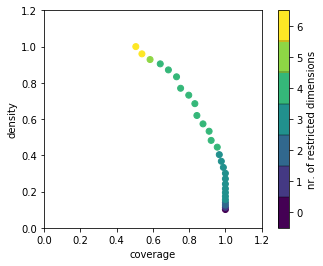

In [3]:
import matplotlib.pyplot as plt

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.show_tradeoff()
plt.show()

In [4]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.100907,0,1.000000,0.100907,0
1,1.000000,0.112374,1,0.897959,0.112374,1
2,1.000000,0.125352,2,0.804989,0.125352,2
3,1.000000,0.139498,3,0.723356,0.139498,2
4,1.000000,0.155323,4,0.649660,0.155323,3
5,1.000000,0.173489,5,0.581633,0.173489,3
6,1.000000,0.194323,6,0.519274,0.194323,3
7,1.000000,0.216019,7,0.467120,0.216019,3
8,1.000000,0.241848,8,0.417234,0.241848,3
9,1.000000,0.270517,9,0.373016,0.270517,3


coverage     0.752809
density      0.770115
id                 21
mass        0.0986395
mean         0.770115
res_dim             4
Name: 21, dtype: object

                            box 21                                            
                               min         max                       qp values
Total biomass           450.000000  755.799988   [-1.0, 4.716968553178765e-06]
Demand elasticity        -0.422000   -0.202000  [1.1849299115762218e-16, -1.0]
Biomass backstop price  150.049995  199.600006   [3.515112530263049e-11, -1.0]
Cellulosic cost          72.650002  133.699997     [0.15741333528927348, -1.0]



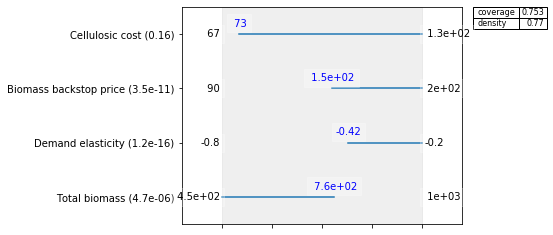

In [5]:
box1.inspect(21)
box1.inspect(21, style='graph')
plt.show()

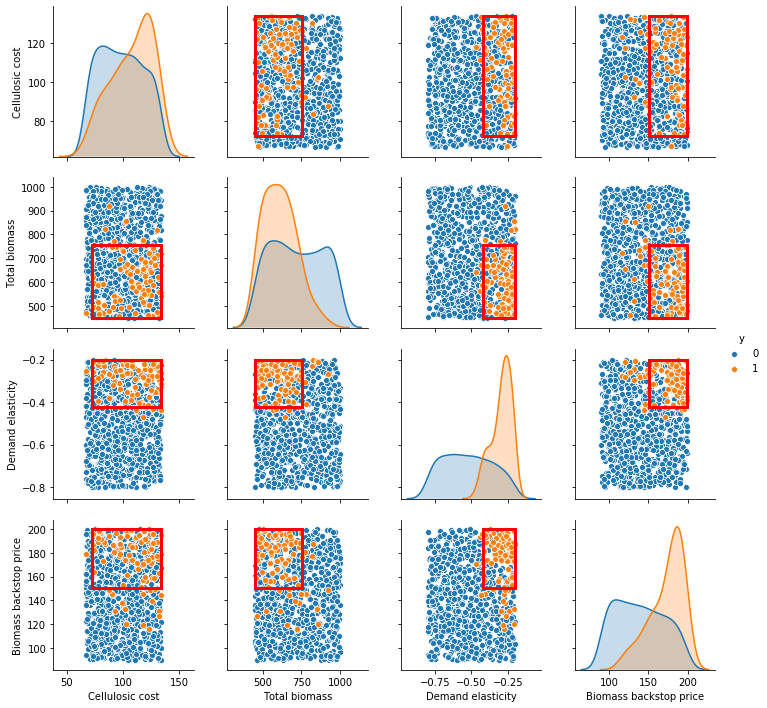

In [6]:
box1.select(21)
fig = box1.show_pairs_scatter()
plt.show()

In [7]:
box2 = prim_alg.find_box()
print(prim_alg.stats_to_dataframe())
print(prim_alg.boxes_to_dataframe())

[MainProcess/INFO] 795 points remaining, containing 22 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.3469387755102041, returning dump box


       coverage   density      mass  res_dim
box 1  0.752809  0.770115  0.098639        4
box 2  0.247191  0.027673  0.901361        0
                             box 1              box 2            
                               min         max    min         max
Demand elasticity        -0.422000   -0.202000   -0.8   -0.202000
Biomass backstop price  150.049995  199.600006   90.0  199.600006
Total biomass           450.000000  755.799988  450.0  997.799988
Cellulosic cost          72.650002  133.699997   67.0  133.699997


In [8]:
from ema_workbench.analysis import cart
cart_alg = cart.CART(x,y, 0.05)
cart_alg.build_tree()
print(cart_alg.stats_to_dataframe())
print(cart_alg.boxes_to_dataframe())

       coverage   density      mass  res dim
box 1  0.011236  0.021739  0.052154        2
box 2  0.000000  0.000000  0.546485        2
box 3  0.000000  0.000000  0.103175        2
box 4  0.044944  0.090909  0.049887        2
box 5  0.224719  0.434783  0.052154        2
box 6  0.112360  0.227273  0.049887        3
box 7  0.000000  0.000000  0.051020        3
box 8  0.606742  0.642857  0.095238        2
                       box 1                  box 2               box 3  \
                         min         max        min         max     min   
Cellulosic yield        80.0   81.649998  81.649998   99.900002  80.000   
Demand elasticity       -0.8   -0.439000  -0.800000   -0.439000  -0.439   
Biomass backstop price  90.0  199.600006  90.000000  199.600006  90.000   

                                         box 4                box 5  \
                               max         min         max      min   
Cellulosic yield         99.900002   80.000000   99.900002   80.000   
Demand

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [9]:
Rozenberg = pd.read_csv("./data/Rozenberg et al 2014.csv")

x = Rozenberg.iloc[:, :7]

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 0.9375, mass: 0.055944055944055944, coverage: 0.3409090909090909, density: 0.9375 restricted_dimensions: 4


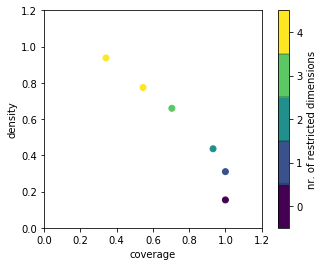

[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.5625, returning dump box
[MainProcess/INFO] 286 points remaining, containing 28 cases of interest
[MainProcess/INFO] mean: 0.5625, mass: 0.055944055944055944, coverage: 0.32142857142857145, density: 0.5625 restricted_dimensions: 4


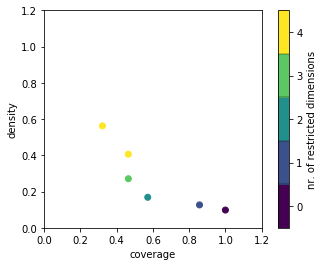

[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 0.9166666666666666, mass: 0.08391608391608392, coverage: 0.55, density: 0.9166666666666666 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 40 cases of interest
[MainProcess/INFO] mean: 0.9166666666666666, mass: 0.08391608391608392, coverage: 0.55, density: 0.9166666666666666 restricted_dimensions: 4


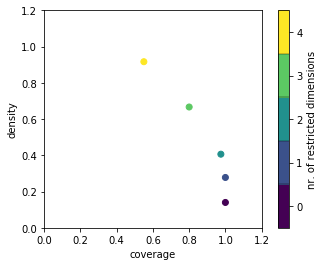

[MainProcess/INFO] 286 points remaining, containing 23 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.055944055944055944, coverage: 0.6956521739130435, density: 1.0 restricted_dimensions: 4
[MainProcess/INFO] 286 points remaining, containing 23 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.055944055944055944, coverage: 0.6956521739130435, density: 1.0 restricted_dimensions: 4


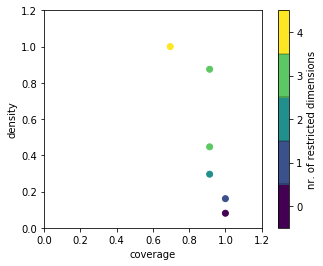

[MainProcess/INFO] 286 points remaining, containing 19 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.4583333333333333, returning dump box
[MainProcess/INFO] 286 points remaining, containing 19 cases of interest
[MainProcess/INFO] mean: 0.4583333333333333, mass: 0.08391608391608392, coverage: 0.5789473684210527, density: 0.4583333333333333 restricted_dimensions: 3


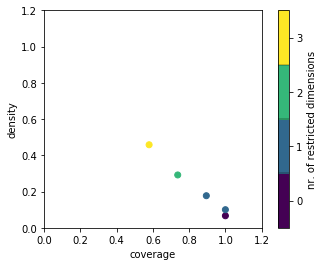

In [10]:
import matplotlib.pyplot as plt

for i in range(1,6):
    y = Rozenberg.loc[:, 'SSP'+str(i)]
    prim_alg = prim.Prim(x,y, threshold=0.8, peel_alpha=0.1)
    box1 = prim_alg.find_box()
    if box1.density < 0.8:
        threshold = box1.density
    else:
        threshold = 0.8
    prim_alg = prim.Prim(x,y , threshold=threshold, peel_alpha=0.1)
    box2 = prim_alg.find_box()
    box2.show_tradeoff()
    plt.show()

In [14]:
box2.inspect(3)
plt.show()

coverage    0.736842
density     0.291667
id                 3
mass        0.167832
mean        0.291667
res_dim            2
Name: 3, dtype: object

             box 3                                    
               min  max                      qp values
convergence    2.0  2.0  [0.0005685305576793595, -1.0]
inequalities   1.0  1.0     [0.0350590656942195, -1.0]



# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [16]:
from ema_workbench import load_results
hamarat = load_results('./data/Hamarat et al 2013.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\jaspe\Dropbox\Master\Q4 19-20\Model-based\Week 3-4 - vulnerability analysis Marc\data\Hamarat et al 2013.gz


[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.732824427480916, mass: 0.0524, coverage: 0.22043628013777267, density: 0.732824427480916 restricted_dimensions: 12


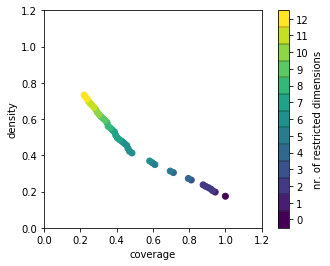

In [18]:
x, outcomes = hamarat
data = outcomes['fraction renewables']
y = data[:, -1] < data[:, 0]

prim_alg = prim.Prim(x, y, mass_min=0.05, threshold=0.1, peel_alpha=0.05)
box3 = prim_alg.find_box()

box3.show_tradeoff()
plt.show()

SWITCH economic growth [1, 2, 5, 3, 4, 6]
SWITCH electrification rate [1, 2, 4, 5, 3, 6]


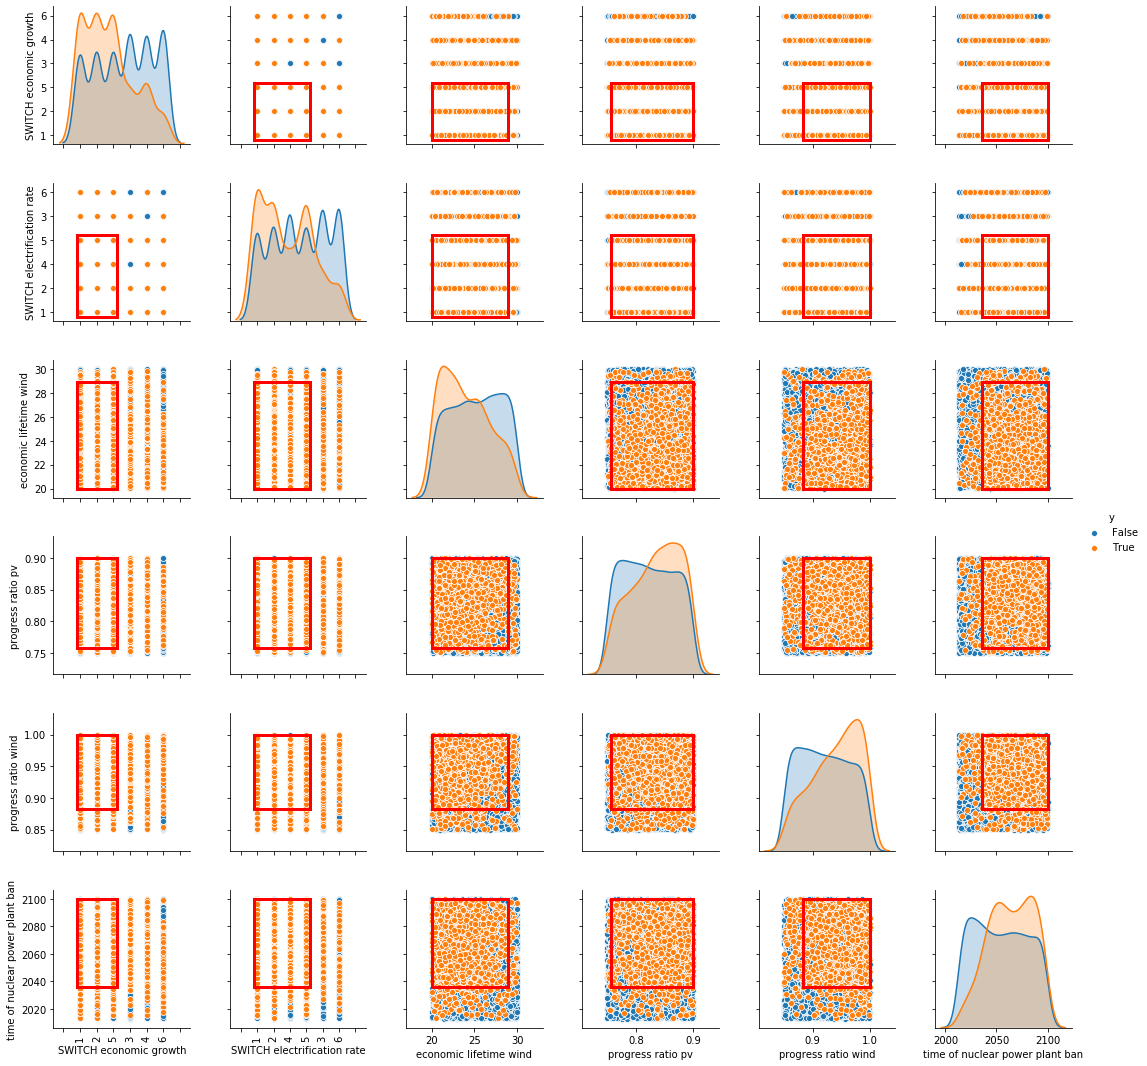

In [19]:
box3.show_pairs_scatter(19)
plt.show()

In [20]:
x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
x_categorical = x.select_dtypes(include=pd.CategoricalDtype)

rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, y)

rotated_x = pd.concat([rotated_experiments, x_categorical], axis=1)

In [21]:
prim_obj = prim.Prim(rotated_x, y, mass_min=0.05, threshold=0.1, peel_alpha=0.05)
box1 = prim_obj.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.84375, mass: 0.0576, coverage: 0.27898966704936856, density: 0.84375 restricted_dimensions: 13


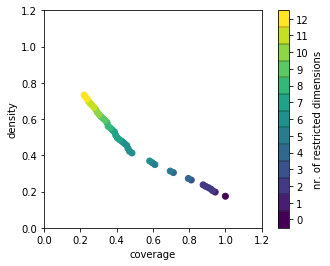

In [22]:
box3.show_tradeoff()
plt.show()

SWITCH economic growth [1, 2, 5, 3, 4, 6]
SWITCH electrification rate [1, 2, 4, 5, 3, 6]


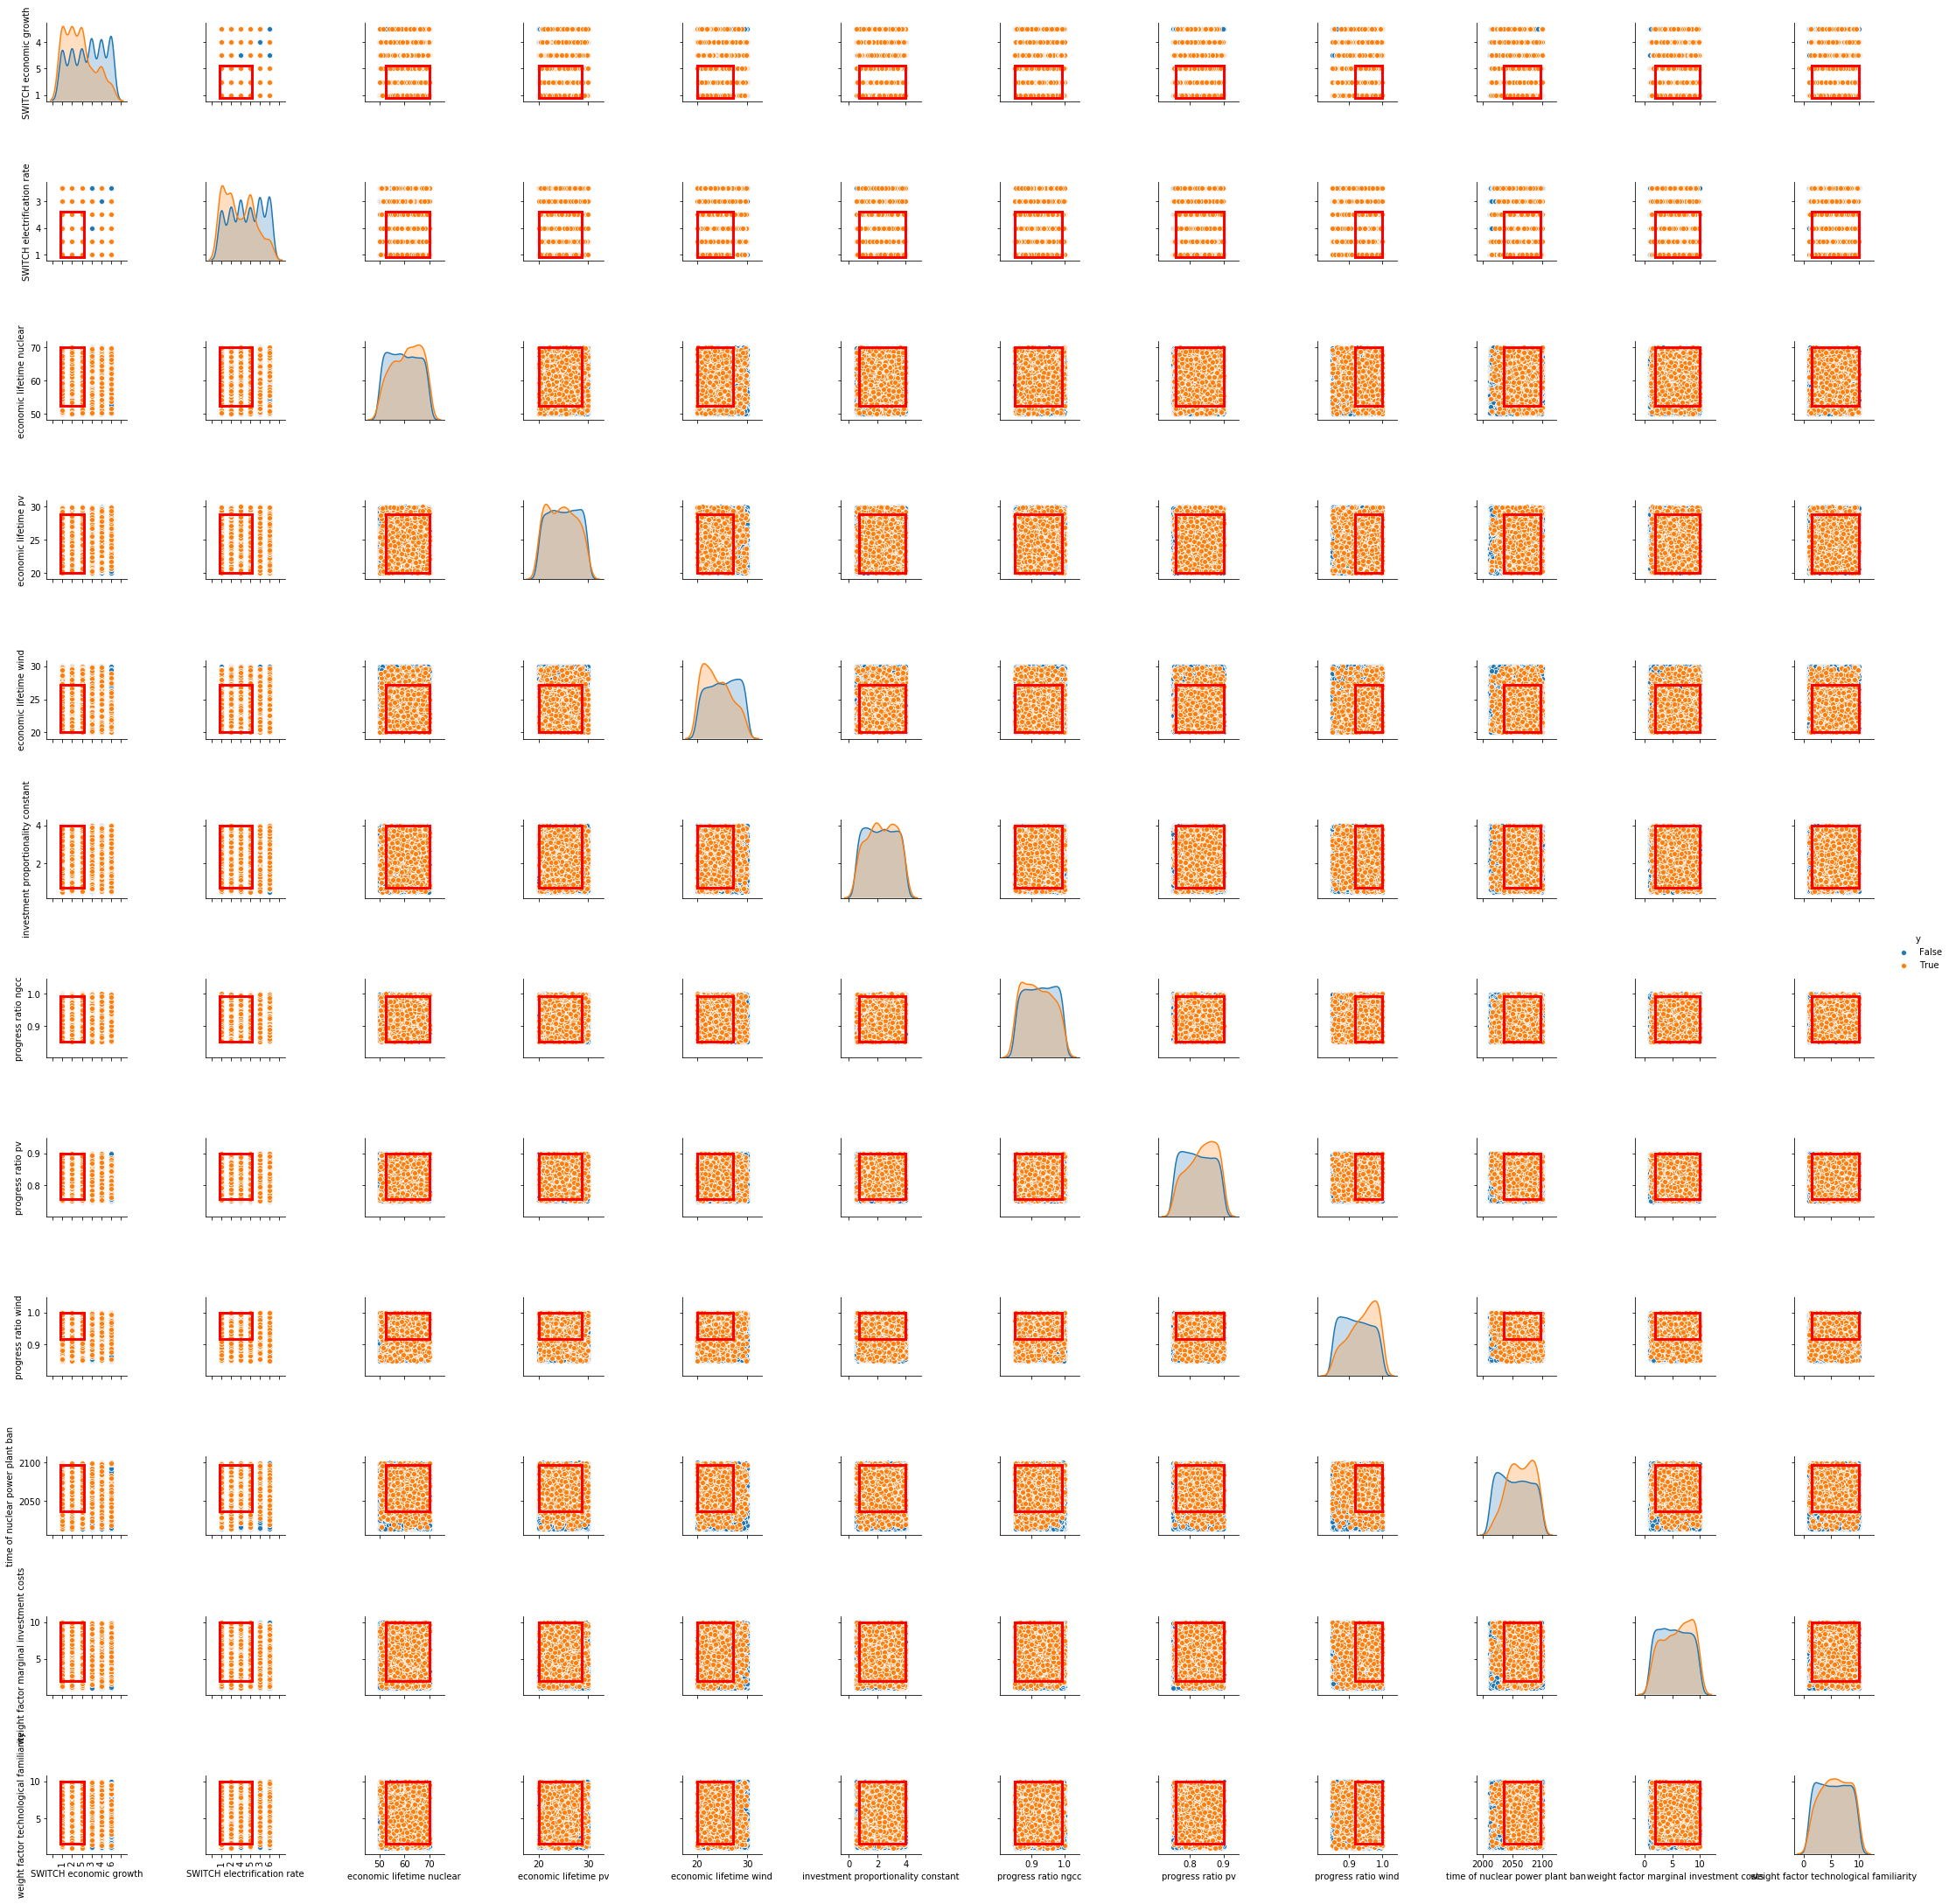

In [23]:
box3.show_pairs_scatter()
plt.show()